In [9]:
# importing sys
import sys
  
# adding srcpy to the system path
sys.path.insert(0, "/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/srcpy")

import data_proc, feature_proc

# Auto reload: watch a directory for changed files and restarts a process when the change is detected
%load_ext autoreload
%autoreload 2

import random
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None
pd.options.display.float_format

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
mpl.style.use("ggplot")
pylab.rcParams["figure.figsize"] = 8 , 6

import seaborn as sns
sns.set_style("white")

from pandas_profiling import ProfileReport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
df= data_proc.load_training_data("/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/data/zillow.csv")
data_proc.rename_columns(df)
df = data_proc.del_dup(df)
#df = data_proc.encode_cat(df)
#df = data_proc.convert_true_to_float(df, "has_add_attributions")
df.head()

,price,status,add_attr,city,state,lat,long,bath,bed,living,lot_a,tax_assessed,fireplace,parking,covered,garage,total_spaces,lot_f,subtype,architectural,year,sewer,water,app,heating,cooling,stories,materials,roof,foundation,interior,compensation
0,274000,House for sale,True,South Ozone Park,NY,40.675730,-73.822350,1,3,1556,2400.0,0,none,Garage - Detached,1.750,1.595,1.945,none,none,none,1930.0,none,none,none,none,none,0.0,none,none,none,none,none
1,270000,House for sale,True,Jamaica,NY,40.670036,-73.780450,2,4,1920,3998.0,678000,none,none,1.660,1.535,2.160,none,none,none,1950.0,none,none,microwave,none,none,0.0,none,none,none,none,none
2,899000,House for sale,True,Staten Island,NY,40.524227,-74.215790,3,3,2532,6903.0,637000,none,Detache,1.935,2.000,2.000,none,Single Family - Detached,Colonial,1899.0,Public Sewer,none,dishwasher,hot water,Units,2.0,none,none,none,none,none
3,1390000,House for sale,True,Flushing,NY,40.721615,-73.820755,4,4,1915,2697.0,894000,none,none,1.695,1.655,3.915,none,none,none,1945.0,none,none,dryer,none,none,0.0,none,none,none,none,none
5,1380000,House for sale,True,Brooklyn,NY,40.604470,-73.943960,4,3,1800,2000.0,0,none,Shared Drivewa,1.700,1.000,2.160,Near Public Transit,Single Family Residence,2 Story,1930.0,Public Sewer,Public,dishwasher,natural gas,Wall Unit(s),2.0,brick,none,none,Formal Dining Roo,none


In [ ]:
# Maps 
import plotly.express as px
import pandas as pd

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="long", 
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


# Process outliers, OOD, missing

# Continous

In [ ]:
df.select_dtypes(exclude=["number","bool_","object_"])

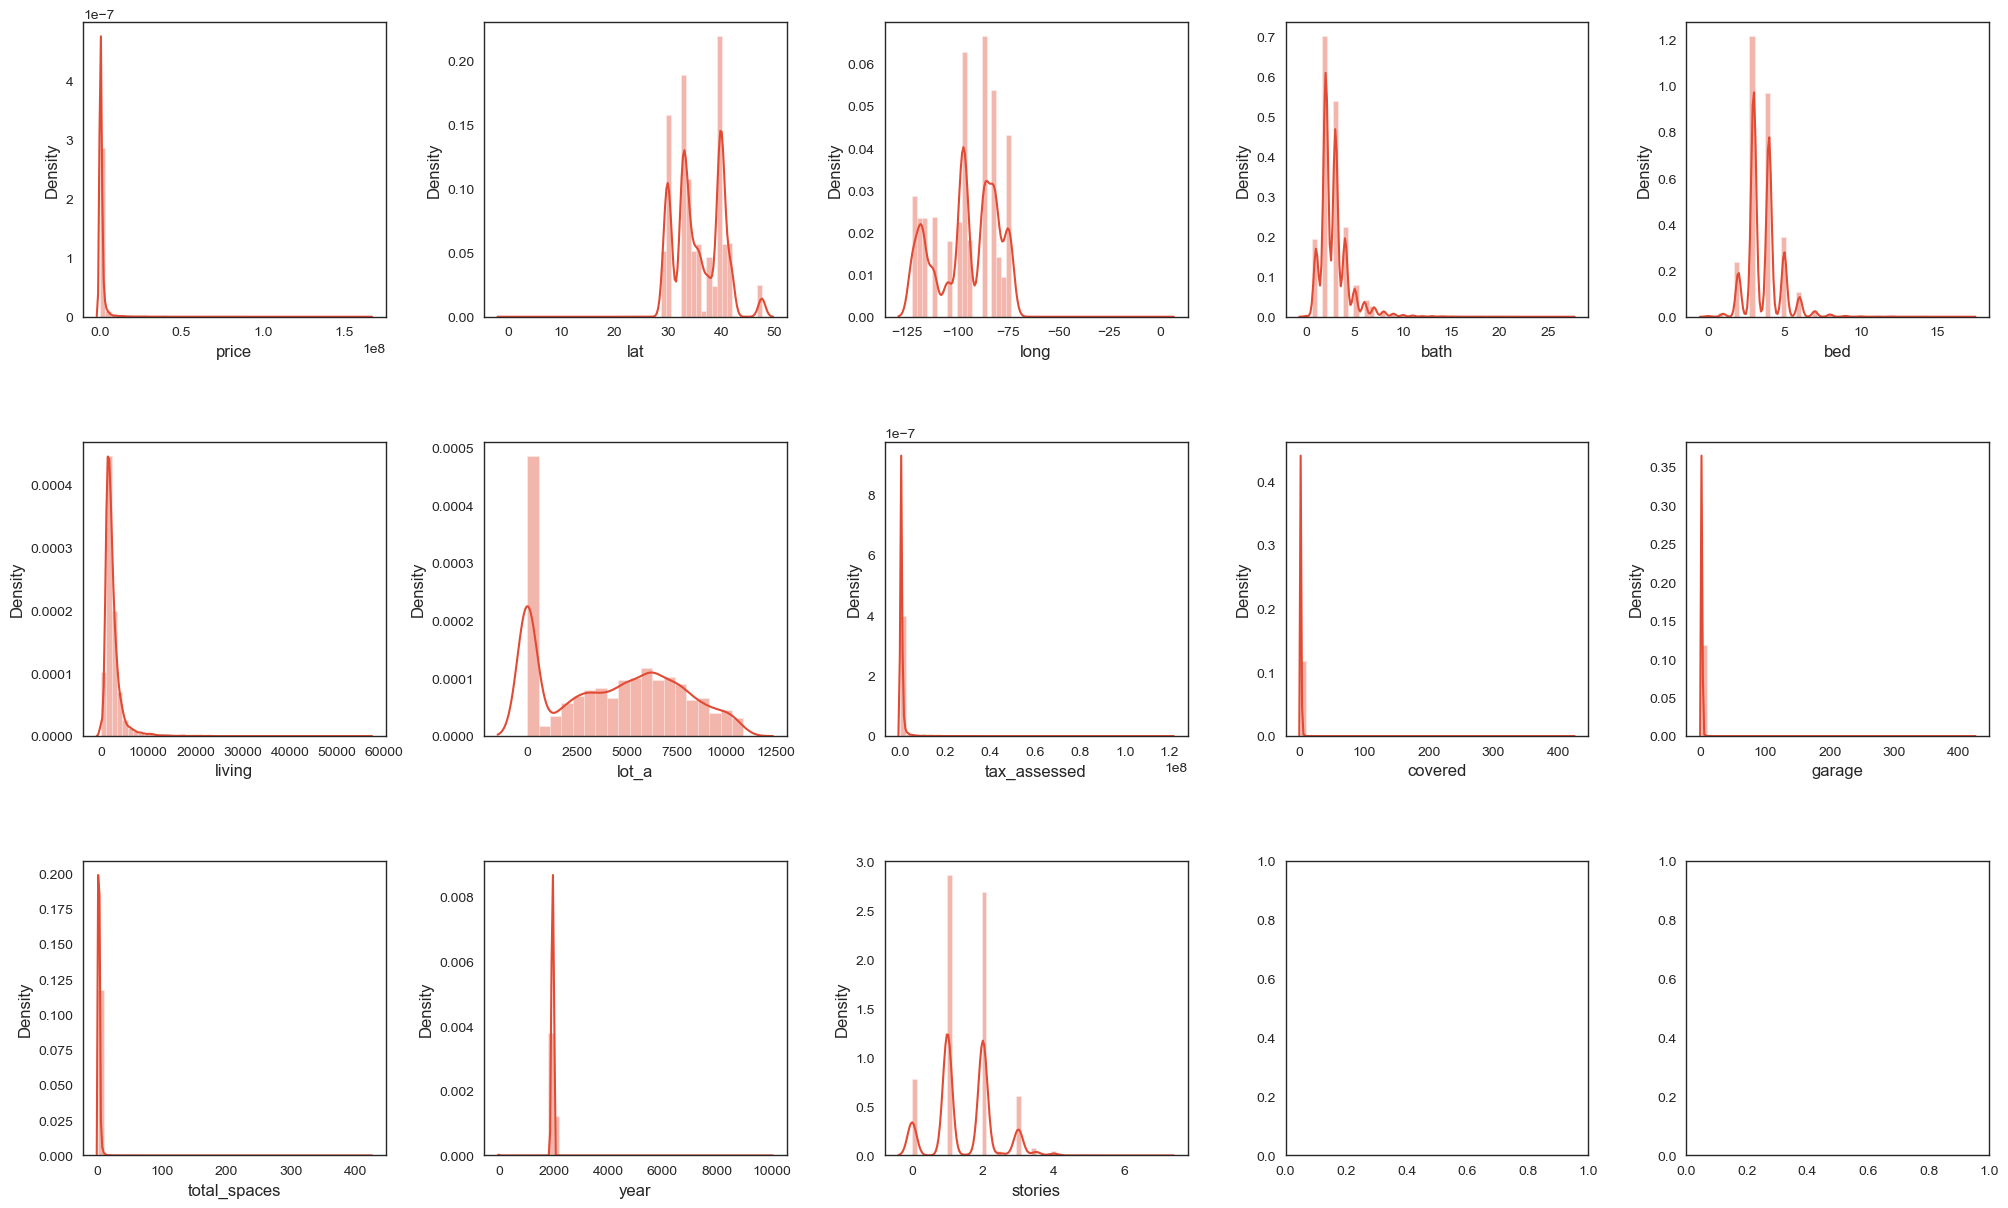

In [14]:
# Destiny
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize=(20, 12))
index = 0
axs = axs.flatten()
for k,v in df.select_dtypes(include=["number"]).items():
    sns.distplot(v, ax=axs[index])
    index += 1
    if index == 13:
        break
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show();